In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import zipfile
sns.set_theme(style="darkgrid")

In [4]:
zip_file_path = 'datasets/archive (2).zip'
extract_to = 'datasets/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [5]:
transaction_data = pd.read_csv(extract_to + "PS_20174392719_1491204439457_log.csv")
transaction_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
transaction_data.shape

(6362620, 11)

In [7]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
transaction_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
transaction_data['nameDest'].nunique()

2722362

In [10]:
transaction_data['nameOrig'].nunique()

6353307

In [11]:
transaction_data = transaction_data.drop(labels= ['nameOrig' , 'nameDest'], axis=1)
transaction_data.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1124208,130,CASH_IN,175473.23,5503296.95,5678770.18,268127.53,92654.30,0,0
1777738,162,CASH_OUT,113188.70,0.00,0.00,272349.50,385538.20,0,0
3789069,280,CASH_OUT,176463.91,0.00,0.00,180656.12,357120.03,0,0
1957537,178,CASH_OUT,171475.39,61434.00,0.00,30042.50,201517.89,0,0
876969,42,CASH_OUT,352326.27,3039.00,0.00,90407.34,442733.61,0,0


In [12]:
transaction_data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

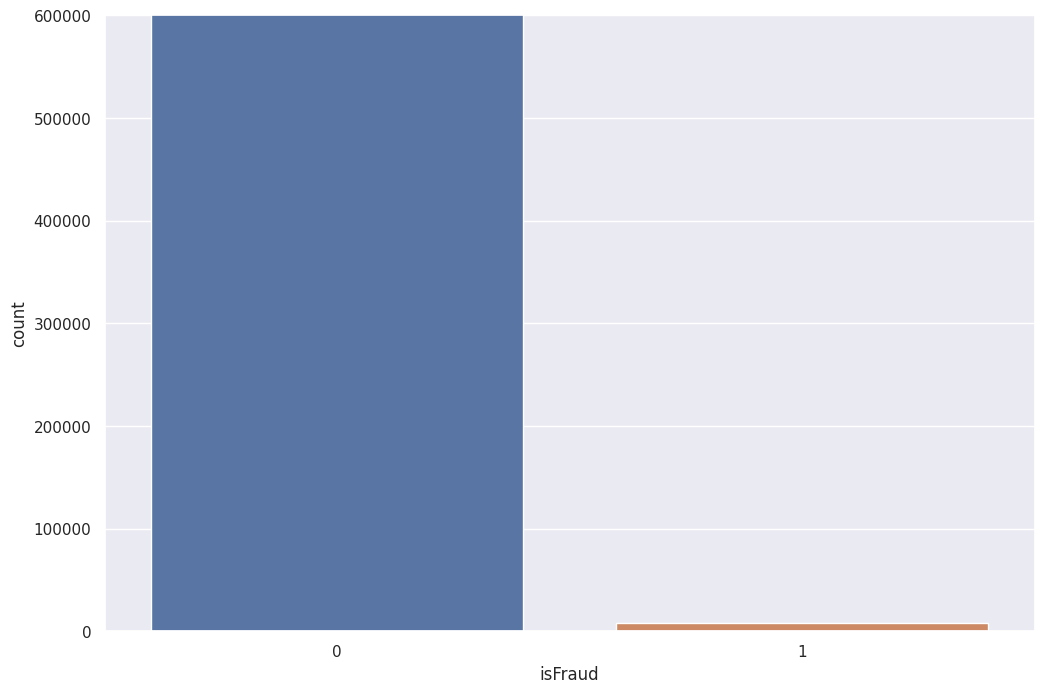

In [13]:
plt.figure(figsize= (12, 8))
plt.ylim([0, 600000])
sns.countplot(x='isFraud', data= transaction_data)

/home/cbc/data/mldetection/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

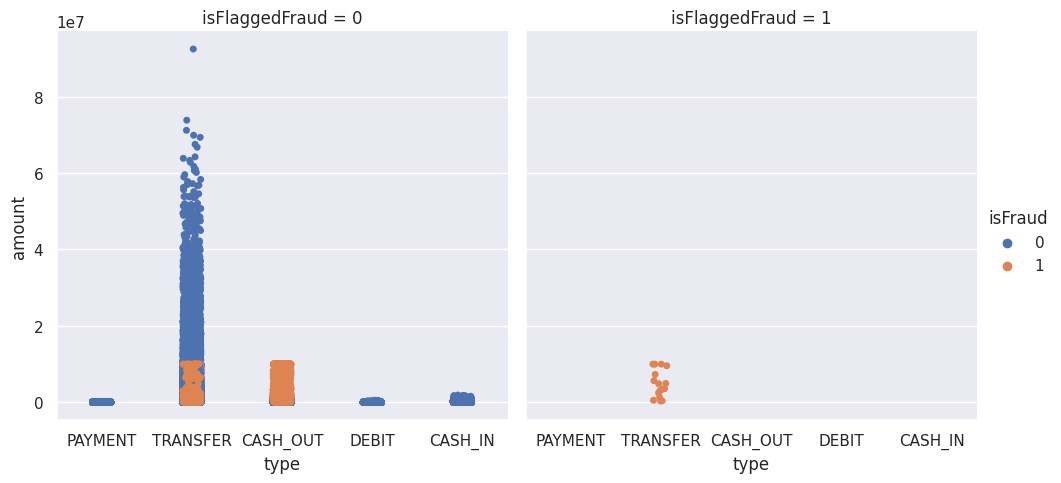

In [14]:
plt.figure(figsize=( 12, 8))

sns.catplot(x = 'type', y = 'amount', estimator = sum,
            hue = 'isFraud', col = 'isFlaggedFraud',
            data = transaction_data);

<Axes: xlabel='step', ylabel='Count'>

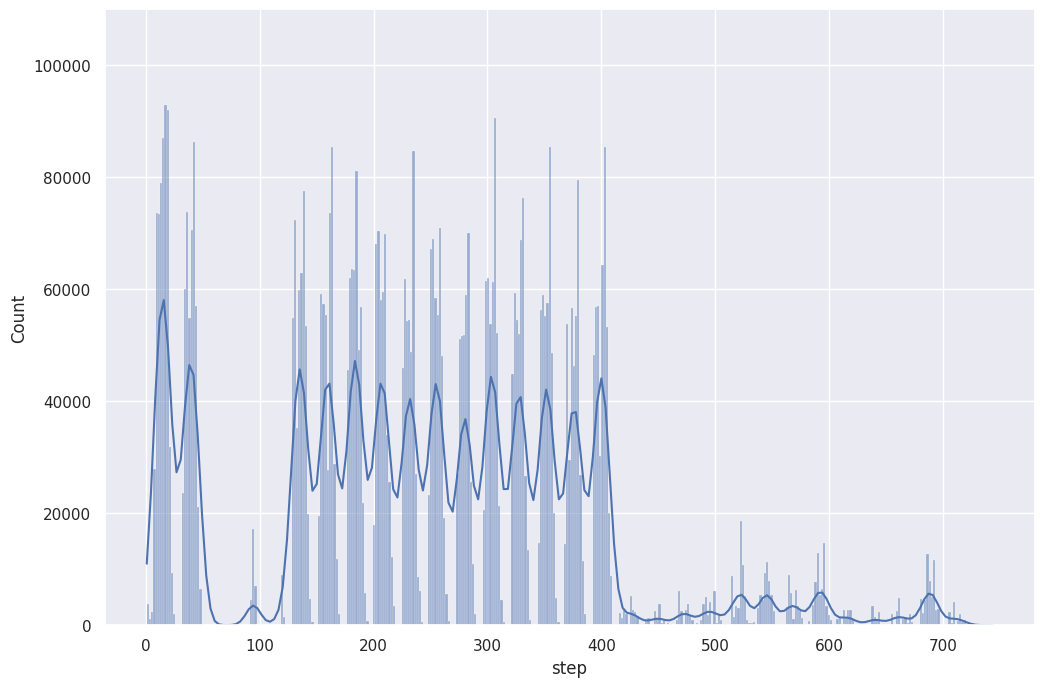

In [15]:
plt.figure(figsize=(12, 8))
plt.ylim([0, 110000])
sns.histplot(transaction_data['step'], kde= True)

In [16]:
transaction_data['step'] = transaction_data['step'] % 24
transaction_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


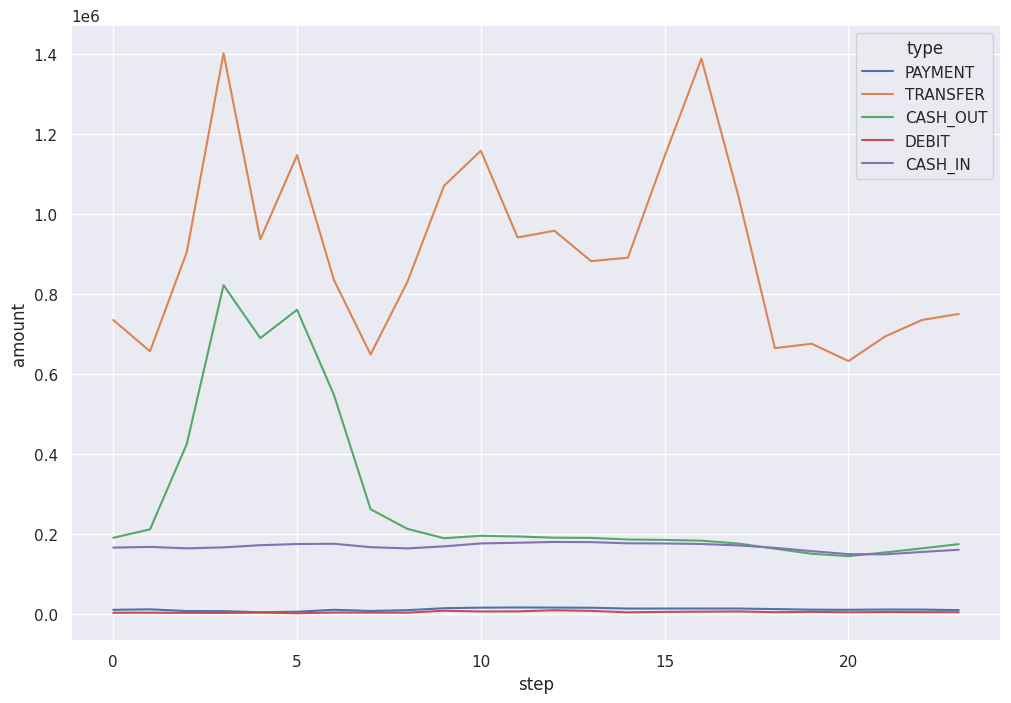

In [17]:
plt.figure(figsize = (12,8))

sns.lineplot(x = 'step', y = 'amount', hue= 'type', errorbar= None,
            estimator = 'mean', data = transaction_data);

/home/cbc/data/mldetection/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


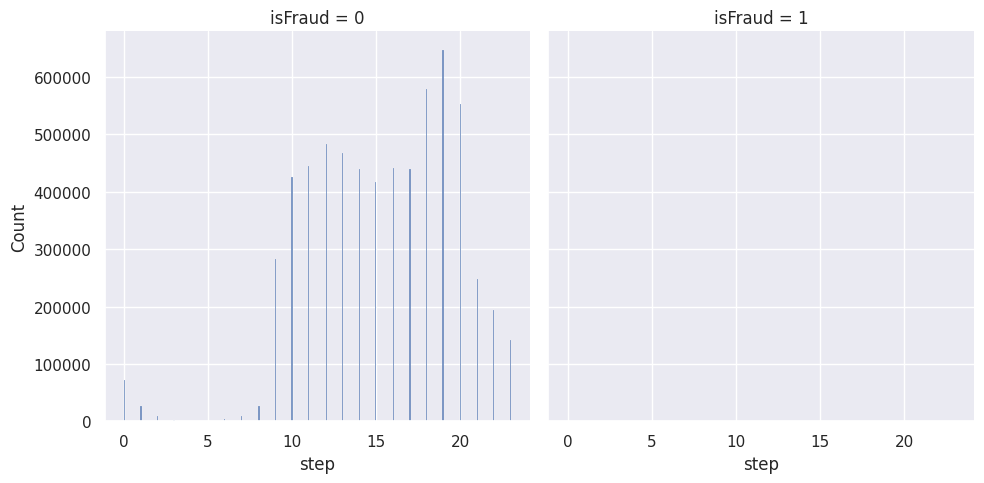

In [18]:
sns.displot(data= transaction_data, x= 'step', col= 'isFraud');

<Axes: xlabel='type', ylabel='count'>

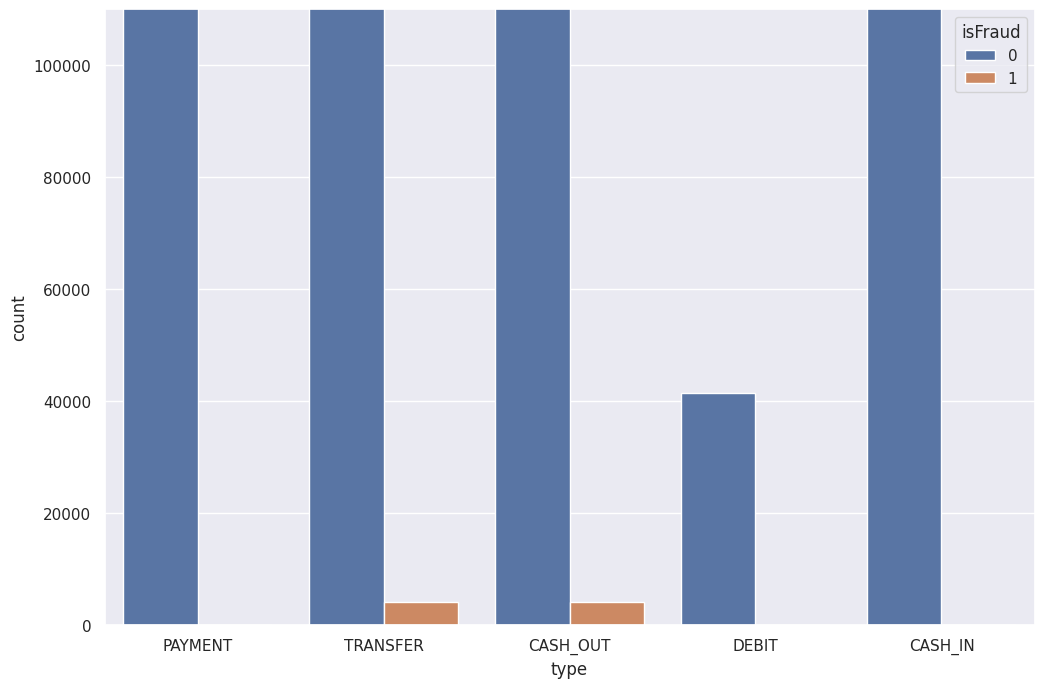

In [19]:
plt.figure(figsize= (12, 8))
plt.ylim([0, 110000])
sns.countplot(x = 'type', hue= 'isFraud', data = transaction_data)

In [20]:
transaction_data = transaction_data.loc[(transaction_data.type == 'TRANSFER') | \
                                        (transaction_data.type =='CASH_OUT')]
                                    
transaction_data.shape

(2770409, 9)

In [21]:
transaction_data = pd.concat([transaction_data,
                                pd.get_dummies(transaction_data['type'],
                                prefix = 'type', drop_first = True)],
                                axis = 1)
                    
transaction_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_TRANSFER
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0,True
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0,False
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,0,False
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,0,True
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,True


In [22]:
transaction_data = transaction_data.drop(labels= ['type', 'isFlaggedFraud'], axis= 1)

transaction_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,True
3,1,181.00,181.0,0.0,21182.0,0.00,1,False
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,False
19,1,215310.30,705.0,0.0,22425.0,0.00,0,True
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,True


In [23]:
transaction_data['origBalanceDiscrepancy'] = \
    transaction_data.newbalanceOrig + transaction_data.amount - transaction_data.oldbalanceOrg

transaction_data['destBalanceDiscrepancy'] = \
    transaction_data.oldbalanceDest + transaction_data.amount - transaction_data.newbalanceDest

/home/cbc/data/mldetection/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


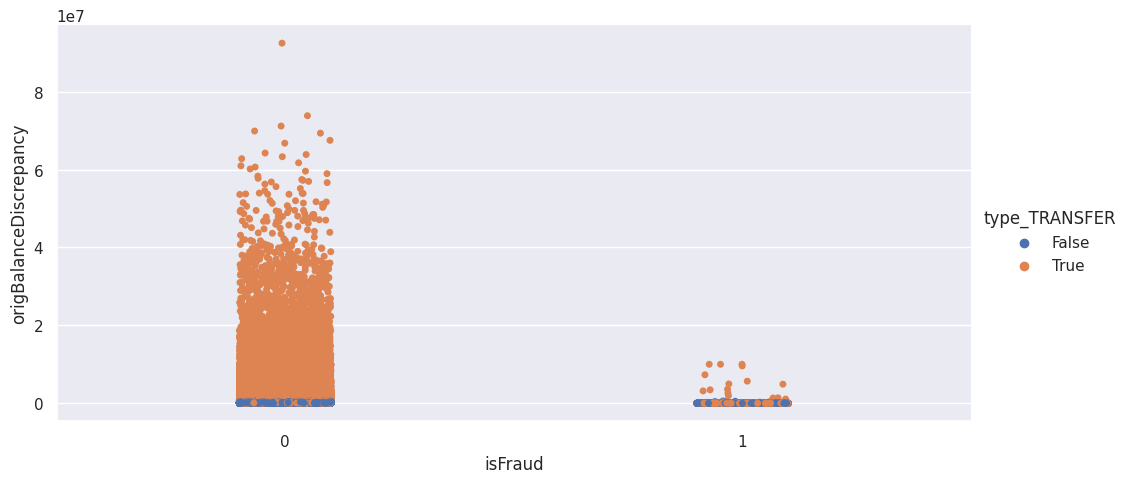

In [24]:
sns.catplot(x = 'isFraud', y = 'origBalanceDiscrepancy', estimator= sum,
            hue = 'type_TRANSFER', data = transaction_data, aspect = 2)

/home/cbc/data/mldetection/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


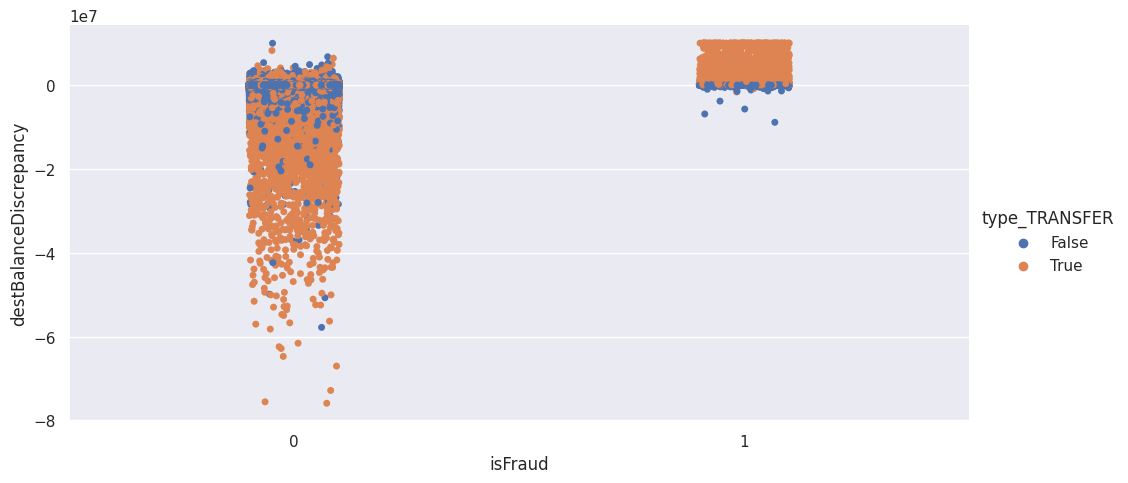

In [25]:
sns.catplot(x = 'isFraud', y = 'destBalanceDiscrepancy', estimator= sum,
            hue = 'type_TRANSFER', data = transaction_data, aspect = 2)

In [26]:
transaction_data.to_csv('datasets/preprocessed_transaction_data.csv', index= False)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

In [28]:
transaction_data = pd.read_csv('datasets/preprocessed_transaction_data.csv')
transaction_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_TRANSFER,origBalanceDiscrepancy,destBalanceDiscrepancy
0,1,181.00,181.0,0.0,0.0,0.00,1,True,0.00,181.0
1,1,181.00,181.0,0.0,21182.0,0.00,1,False,0.00,21363.0
2,1,229133.94,15325.0,0.0,5083.0,51513.44,0,False,213808.94,182703.5
3,1,215310.30,705.0,0.0,22425.0,0.00,0,True,214605.30,237735.3
4,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,True,300850.89,-2401220.0


In [29]:
X = transaction_data.drop(['isFraud'], axis= 1)
y = transaction_data['isFraud']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 123)
X_train.shape, X_test.shape

((1939286, 9), (831123, 9))

In [31]:
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred_logistic = logistic_clf.predict(X_test)

y_pred_logistic[:5]

array([0, 0, 0, 0, 0])

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Logistic Regression\n')

print('Accuracy: ', accuracy_score(y_test, y_pred_logistic))
print('Precision: ', precision_score(y_test, y_pred_logistic))
print('Recall: ', recall_score(y_test, y_pred_logistic))

Logistic Regression

Accuracy:  0.9981627268166083
Precision:  0.8326848249027238
Recall:  0.5029377203290247


In [34]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()

gnb_clf.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred_gnb = gnb_clf.predict(X_test)

y_pred_gnb[:5]

array([0, 0, 0, 0, 0])

In [36]:
print('Naive Bayes \n')

print('Accuracy: ', accuracy_score(y_test, y_pred_gnb))
print('Precision: ', precision_score(y_test, y_pred_gnb))
print('Recall: ', recall_score(y_test, y_pred_gnb))

Naive Bayes 

Accuracy:  0.9875072642677437
Precision:  0.09854388843314192
Recall:  0.3764198981590286


In [37]:
from sklearn.svm import SVC

svc_clf = SVC()

svc_clf.fit(X_train, y_train)

SVC()

In [38]:
y_pred_svc = svc_clf.predict(X_test)

y_pred_svc[:5]

array([0, 0, 0, 0, 0])

In [39]:
print('Support Vector Classifier\n')

print('Accuracy: ', accuracy_score(y_test, y_pred_svc))
print('Precision: ', precision_score(y_test, y_pred_svc))
print('Recall: ', recall_score(y_test, y_pred_svc))

Support Vector Classifier

Accuracy:  0.9980183438552417
Precision:  0.9860515021459227
Recall:  0.3599686643164904


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred_rf = rf_clf.predict(X_test)

y_pred_rf[:5]

array([0, 0, 0, 0, 0])

In [44]:
print('Random Forest\n')

print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print('Precision: ', precision_score(y_test, y_pred_rf))
print('Recall: ', recall_score(y_test, y_pred_rf))

Random Forest

Accuracy:  0.9999867648952081
Precision:  0.9996069182389937
Recall:  0.9960830395613004
